In [29]:
import pandas
from pandas import DataFrame

# Load file CSV

In [30]:
df = pandas.read_csv('ShiftLeave_2020-04_1.csv')
df

,StaffID,Wed,Thu,Fri,Sat,Sun,Mon,Tue,Wed.1,Thu.1,...,Tue.2,Wed.3,Thu.3,Fri.3,Sat.3,Sun.3,Mon.3,Tue.3,Wed.4,Thu.4
0,A0002,1,1,UL,NaN,NaN,2,UL,2,UL,...,1,1,1,AL+/2,NaN,NaN,2,2,2,2
1,A0003,4,4,4,NaN,NaN,UL,UL,4,UL,...,4,4,4,AL/2,NaN,NaN,2,4,4,4
2,A0004,1,1,UL,NaN,NaN,2,UL,2,2,...,1,1,AL+/2,1,NaN,NaN,2,2,2,2
3,A0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
4,A0009,2,2,UL,NaN,NaN,1,UL,1,UL,...,AL+/2,2,2,AL,NaN,NaN,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,H0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,H0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,H0004,1,1,1,NaN,NaN,1,1,1,1,...,1,1,1,1,NaN,NaN,NaN,1,1,1
90,H0007,0,0,UL,NaN,NaN,UL/2,UL/2,UL/2,0,...,0,0,0,0,NaN,NaN,0,0,0,0


# Reshape dataframe using melt

In [31]:
data = pandas.melt(df, id_vars=["StaffID"], var_name="DayOfTheWeek", value_name="Type")

Documentation:
* https://pandas.pydata.org/docs/reference/api/pandas.melt.html
* https://youtu.be/oY62o-tBHF4

In [32]:
data

,StaffID,DayOfTheWeek,Type
0,A0002,Wed,1
1,A0003,Wed,4
2,A0004,Wed,1
3,A0006,Wed,NaN
4,A0009,Wed,2
...,...,...,...
2755,H0001,Thu.4,NaN
2756,H0002,Thu.4,NaN
2757,H0004,Thu.4,1
2758,H0007,Thu.4,0


# Replace wrong dates format
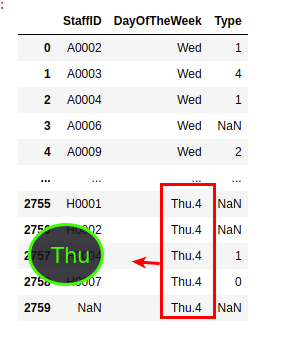

In [33]:
_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Output: 1,2,3,4. 
#(Because we see the last row have DayOfTheWeek = Thu.4, 
#so we loop from 1 to 4)
for i in range(1,5):
    for day in range(len(_week)):
        #Output: [day].[i]. Example: Thu.4
        wrong_day = _week[day] + "." + str(i)
        
        #Repalce Thu.4 -> Thu
        data['DayOfTheWeek'].replace(wrong_day, _week[day], inplace=True)

Doccumentation: 
* range() function: https://pynative.com/python-range-function/
* String in Python: https://vietjack.com/python/string_trong_python.jsp
* Replace values given in to_replace with value:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
https://stackoverflow.com/questions/31888871/pandas-replacing-column-values

In [34]:
data

,StaffID,DayOfTheWeek,Type
0,A0002,Wed,1
1,A0003,Wed,4
2,A0004,Wed,1
3,A0006,Wed,NaN
4,A0009,Wed,2
...,...,...,...
2755,H0001,Thu,NaN
2756,H0002,Thu,NaN
2757,H0004,Thu,1
2758,H0007,Thu,0


# Drop rows have Type is null(NaN)

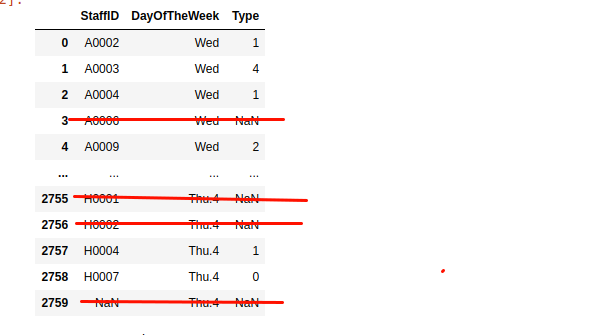

In [35]:
data = data.dropna()

Documentation:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [36]:
data

,StaffID,DayOfTheWeek,Type
0,A0002,Wed,1
1,A0003,Wed,4
2,A0004,Wed,1
4,A0009,Wed,2
5,A0010,Wed,1
...,...,...,...
2751,J0077,Thu,2
2752,J0078,Thu,1
2753,J0079,Thu,2
2757,H0004,Thu,1


# Calculate the average number of staffs working every day of the week 

In [37]:
workings_day = data[data['DayOfTheWeek'] == 'Mon']
print(workings_day)
print("Total:", len(workings_day))

     StaffID DayOfTheWeek Type
460    A0002          Mon    2
461    A0003          Mon   UL
462    A0004          Mon    2
464    A0009          Mon    1
465    A0010          Mon   UL
...      ...          ...  ...
2474   J0075          Mon    2
2475   J0077          Mon    2
2476   J0078          Mon    2
2477   J0079          Mon    2
2482   H0007          Mon    0

[341 rows x 3 columns]
Total: 341


In [38]:
 staffs_working = data[(data['Type'].isin(['0', '1', '2', '3', '4'])) & (data['DayOfTheWeek'] == 'Mon')]
 print(staffs_working)
print("Total:", len(staffs_working))

     StaffID DayOfTheWeek Type
460    A0002          Mon    2
462    A0004          Mon    2
464    A0009          Mon    1
467    A0016          Mon    1
475    A0043          Mon    2
...      ...          ...  ...
2474   J0075          Mon    2
2475   J0077          Mon    2
2476   J0078          Mon    2
2477   J0079          Mon    2
2482   H0007          Mon    0

[236 rows x 3 columns]
Total: 236


(Here is : 236 / 341 * 100)

In [41]:
try:
    average_percentage = len(staffs_working) / len(workings_day) * 100
except ZeroDivisionError:
    average_percentage = 0
print("The average percentage of staffs working on Monday: " + str(round(average_percentage)) + "%")

The average percentage of staffs working on Monday: 69%


****************************************************************

First, we calculate the total number of staffs

In [42]:
print("The total number of staffs: ", round(data['StaffID'].nunique()))

The total number of staffs:  87


#The average number of staffs working on Monday = 87 / 100 * 69.

In [43]:
average_number = data['StaffID'].nunique() / 100 * average_percentage
print("The average number of staffs working on Monday: ", round(average_number))

The average number of staffs working on Monday:  60


**************************************************************

##### NOW, WE ARE USE LOOP FOR CALACULATE EVERY DAY OF THE WEEK

First, create dataframe is the final list of results, with columns DayOfTheWeek, AverageNumber

In [44]:
result = pandas.DataFrame(columns=['DayOfTheWeek', 'AverageNumber'])

In [45]:
for day_of_the_week in range(len(_week)):
    workings_day = data[data['DayOfTheWeek'] ==_week[day_of_the_week]]

    staffs_working = data[(data['Type'].isin(['0', '1', '2', '3', '4'])) & (data['DayOfTheWeek'] == _week[day_of_the_week])]

    try:
        average_percentage = len(staffs_working)/len(workings_day)*100
    except ZeroDivisionError:
        average_percentage = 0
    
    average_number = data['StaffID'].nunique() / 100 * average_percentage
    
    result = result.append({'DayOfTheWeek': _week[day_of_the_week], 'AverageNumber': round(average_number)}, ignore_index=True)

Documentation: 
* Select Rows in DataFrame by conditions on multiple columns:
https://thispointer.com/python-pandas-select-rows-in-dataframe-by-conditions-on-multiple-columns/

* nunique():
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html

* append values to dataframe:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html

# Result final:

In [46]:
print("\n\n*****The average number staffs working on every day of the week:*****\n")
result



*****The average number staffs working on every day of the week:*****



,DayOfTheWeek,AverageNumber
0,Mon,60
1,Tue,62
2,Wed,63
3,Thu,72
4,Fri,49
5,Sat,0
6,Sun,0
